In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [3]:
print(dataset.target.shape)
print(dataset.target_names)

(569,)
['malignant' 'benign']


In [4]:
print(dataset.data.shape)
print(dataset.feature_names)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(data=np.reshape(dataset.target, (-1, 1)), columns=['diagnostic'])

In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.head()

,diagnostic
0,0
1,0
2,0
3,0
4,0


In [8]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
y.value_counts()

diagnostic
1             357
0             212
Name: count, dtype: int64

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [11]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X.columns)

In [12]:
X_train_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-6.332419e-15,-8.920825e-16,-9.662600e-16,1.327388e-15,2.108204e-16,-1.089239e-15,-3.018343e-16,3.103744e-16,-6.611561e-15,-1.260042e-15,...,-9.096509e-16,-1.522592e-15,-2.088683e-16,-1.346908e-16,2.620614e-15,-5.290030e-16,8.549937e-16,7.964325e-16,-4.450652e-16,-2.672343e-15
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-2.038161e+00,-2.039653e+00,-1.992353e+00,-1.448460e+00,-2.391311e+00,-1.609829e+00,-1.116151e+00,-1.264744e+00,-2.687490e+00,-1.774610e+00,...,-1.727044e+00,-2.101047e+00,-1.695039e+00,-1.212789e+00,-2.230127e+00,-1.386630e+00,-1.306978e+00,-1.762277e+00,-2.159217e+00,-1.556804e+00
25%,-6.961874e-01,-7.333470e-01,-6.885409e-01,-6.690702e-01,-7.168756e-01,-7.286422e-01,-7.446261e-01,-7.363529e-01,-6.955978e-01,-7.186508e-01,...,-6.700168e-01,-7.848272e-01,-6.914275e-01,-6.388417e-01,-7.440601e-01,-6.765857e-01,-7.404398e-01,-7.685600e-01,-6.481057e-01,-6.912165e-01
50%,-2.052562e-01,-8.363751e-02,-2.469471e-01,-2.899301e-01,-6.687480e-02,-2.222097e-01,-3.189359e-01,-4.007568e-01,-6.132813e-02,-1.913579e-01,...,-2.750495e-01,-3.087632e-02,-2.891823e-01,-3.467086e-01,-4.550009e-02,-2.534668e-01,-2.195633e-01,-2.362472e-01,-1.449448e-01,-2.183715e-01
75%,4.545213e-01,5.706635e-01,4.730070e-01,3.505547e-01,6.160818e-01,4.661798e-01,4.915743e-01,5.816759e-01,5.123652e-01,4.464742e-01,...,5.097289e-01,7.278667e-01,5.182735e-01,3.372766e-01,5.966544e-01,4.865254e-01,5.114996e-01,7.023184e-01,4.363769e-01,4.261978e-01
max,3.957727e+00,4.595189e+00,3.957651e+00,5.187194e+00,4.682969e+00,4.483810e+00,4.137885e+00,3.893540e+00,4.367869e+00,4.745147e+00,...,4.070622e+00,3.817149e+00,4.259021e+00,5.843496e+00,3.720649e+00,4.973699e+00,4.586717e+00,2.689599e+00,6.099786e+00,6.602919e+00


In [13]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

In [14]:
pca.explained_variance_ratio_

array([0.43537712, 0.19591045])

In [15]:
y_train

,diagnostic
546,1
365,0
219,0
292,1
509,0
...,...
14,0
36,0
207,0
456,1


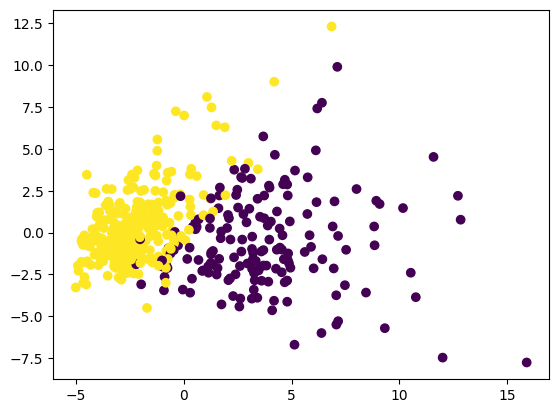

In [16]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.iloc[:, 0])

In [17]:
model = SVC(kernel='linear', C=1)

y_train_labeled = y_train.values.reshape((-1, 1))
y_train_labeled = y_train_labeled
model = model.fit(X=X_train_pca, y=y_train_labeled)
m, b = -model.coef_[0][0], model.intercept_[0]

c:\Users\Diego\miniconda3\envs\store_forecasting\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


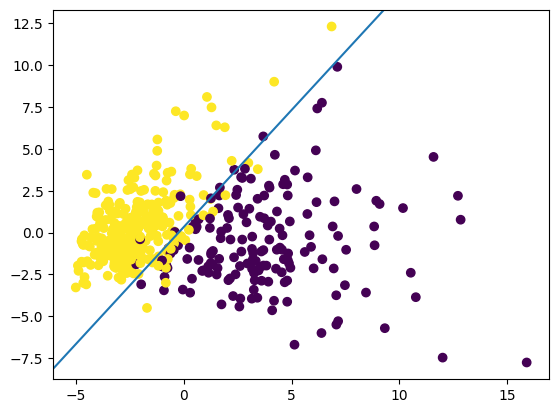

In [18]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.iloc[:, 0])
plt.axline(xy1=(0, b), slope=m)
plt.show()

In [19]:
X_pred = pca.transform(scaler.transform(X_valid))
y_pred = model.predict(X_pred)

c:\Users\Diego\miniconda3\envs\store_forecasting\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


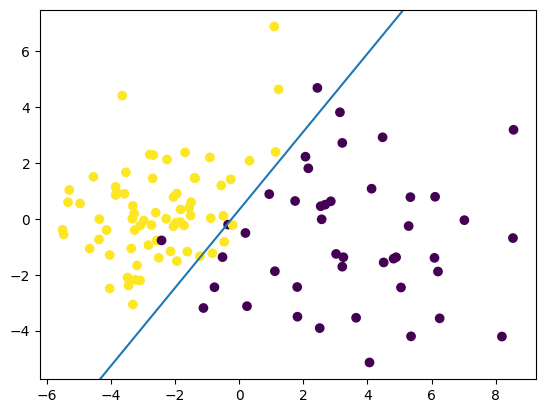

In [20]:
plt.scatter(X_pred[:, 0], X_pred[:, 1], c=y_valid.iloc[:, 0])
plt.axline(xy1=(0, b), slope=m)
plt.show()